In [1]:
from skimage import io
from skimage import img_as_float

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

In [4]:
import torch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from models.prepare_train_val import get_split
from models.transforms import (DualCompose,
                        ImageOnly,
                        Normalize,
                        HorizontalFlip,
                        VerticalFlip,
                        Rotate,
                        RandomBrightness,
                        RandomContrast,
                        AddMargin)

from skimage.io import imread

from models.dataset import SaltDataset

from albumentations import (HorizontalFlip, VerticalFlip, Normalize,
    ShiftScaleRotate, Blur, OpticalDistortion,  GridDistortion, HueSaturationValue, IAAAdditiveGaussianNoise, GaussNoise, MotionBlur,
    MedianBlur, IAAPiecewiseAffine, IAASharpen, IAAEmboss, RandomContrast, RandomBrightness,IAAPerspective, ElasticTransform,
    InvertImg, Flip, OneOf, Compose,CLAHE
)


def mask_overlay(image, mask, color=(0, 1, 0)):
    """
    Helper function to visualize mask on the top of the image
    """
    mask = np.dstack((mask, mask, mask)) * np.array(color)
    weighted_sum = cv2.addWeighted(mask, 0.5, image, 0.5, 0.)
    img = image.copy()
    ind = mask[:, :, 1] > 0
    img[ind] = weighted_sum[ind]    
    return img

def imshow(img, mask, title=None):
    """Imshow for Tensor."""
    img = img.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    img = std * img + mean
    img = np.clip(img, 0, 1)
    mask = mask.numpy().transpose((1, 2, 0))
    mask = np.clip(mask, 0, 1)
    fig = plt.figure(figsize = (12,6))
    fig.add_subplot(1,2,1)
    plt.imshow(mask_overlay(img, mask))
    fig.add_subplot(1,2,2)
    plt.imshow(img)
    if title is not None:
        plt.title(title)
    plt.pause(0.001) 


In [5]:
import os
os.chdir('../')

In [6]:
train_ids, val_ids = get_split(0)

In [7]:
def train_transform(p=1):
        return Compose([
            #PadIfNeeded(min_height=args.train_crop_height, min_width=args.train_crop_width, p=1),
            HorizontalFlip(p=0.5),
            OneOf([
                IAAAdditiveGaussianNoise(),
                GaussNoise(),
            ], p=0.2),
            OneOf([
                MotionBlur(p=0.2),
                MedianBlur(blur_limit=3, p=0.1),
                Blur(blur_limit=3, p=0.1),
            ], p=0.2),
            ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=0, p=0.2),
            OneOf([
                OpticalDistortion(p=0.3),
                GridDistortion(p=0.1),
                IAAPiecewiseAffine(p=0.3),
            ], p=0.2),
            OneOf([
                CLAHE(clip_limit=2),
                IAASharpen(),
                IAAEmboss(),
                RandomContrast(),
                RandomBrightness(),
            ], p=0.3),
            Normalize(p=1)
        ], p=p)


In [8]:
 train_loader = DataLoader(
        dataset=SaltDataset(train_ids, transform=None),
        shuffle=True,
        num_workers=1,
        batch_size=10,
        pin_memory=False)

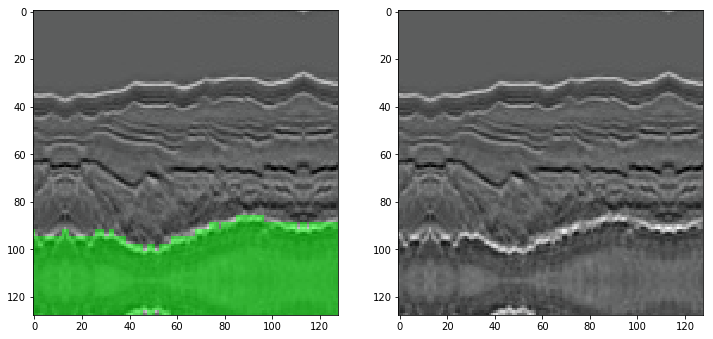

In [9]:
img1, mask1 = next(iter(train_loader))
imshow(img1[0], mask1[0])

In [10]:
mask1[0].shape

torch.Size([1, 128, 128])

In [11]:
(mask1[0]==1).sum()

4546

In [21]:
id_ = '0b73b427d1.png'
img = io.imread('data/train/images/'+ id_)
mask = io.imread('data/train/masks/'+ id_)

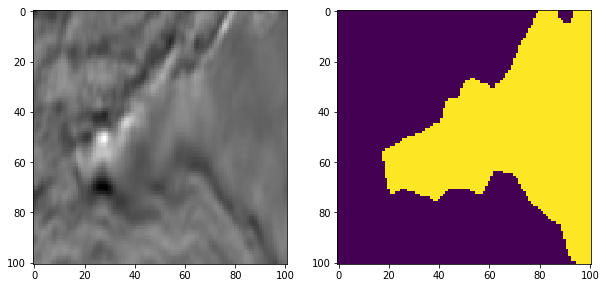

In [16]:
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)
plt.imshow(img)
fig.add_subplot(1,2,2)
plt.imshow((mask >0))

In [ ]:
 data = {"image": img, "mask": mask}

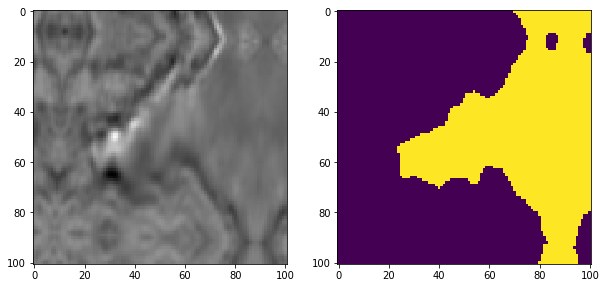

In [89]:
transform = ShiftScaleRotate(shift_limit=0, scale_limit=0.2, rotate_limit=10, p=1)
augmented = transform(image = img, mask = mask)
img1, mask1 = augmented["image"], augmented["mask"]
fig = plt.figure(figsize = (10,5))
fig.add_subplot(1,2,1)
plt.imshow(img1)
fig.add_subplot(1,2,2)
plt.imshow((mask1 >0))

In [24]:
img[:,:]

array([[0.19607843, 0.24705882, 0.31764706, ..., 0.39215686, 0.34901961,
        0.36470588],
       [0.23529412, 0.28627451, 0.32941176, ..., 0.38823529, 0.35686275,
        0.37647059],
       [0.30588235, 0.34509804, 0.34901961, ..., 0.39215686, 0.37254902,
        0.39215686],
       ...,
       [0.45490196, 0.44313725, 0.45098039, ..., 0.45098039, 0.46666667,
        0.4627451 ],
       [0.47058824, 0.4627451 , 0.47058824, ..., 0.42745098, 0.45098039,
        0.45098039],
       [0.49411765, 0.48627451, 0.48627451, ..., 0.4       , 0.43137255,
        0.43529412]])

In [25]:
img2 = io.imread('data/train/images/'+ id_)

In [27]:
img2[:,:,0]/255

array([[0.19607843, 0.24705882, 0.31764706, ..., 0.39215686, 0.34901961,
        0.36470588],
       [0.23529412, 0.28627451, 0.32941176, ..., 0.38823529, 0.35686275,
        0.37647059],
       [0.30588235, 0.34509804, 0.34901961, ..., 0.39215686, 0.37254902,
        0.39215686],
       ...,
       [0.45490196, 0.44313725, 0.45098039, ..., 0.45098039, 0.46666667,
        0.4627451 ],
       [0.47058824, 0.4627451 , 0.47058824, ..., 0.42745098, 0.45098039,
        0.45098039],
       [0.49411765, 0.48627451, 0.48627451, ..., 0.4       , 0.43137255,
        0.43529412]])

In [ ]:
pred_dir = 'data/predictions/AlbuNet/OOF/'
train_dir = 'data/train/'
def show_image(file_name):
    global mask, mask_pred
    img = imread(train_dir + "images/" + file_name)
    mask = imread(train_dir + "masks/" + file_name)
    mask_pred = img_as_float(imread(pred_dir + file_name))
    fig = plt.figure(figsize = (18,6))
    fig.add_subplot(1,4,1)
    plt.imshow(img)
    fig.add_subplot(1,4,2)
    plt.imshow(mask)
    fig.add_subplot(1,4,3)
    plt.imshow(mask_pred)
    fig.add_subplot(1,4,4)
    plt.imshow((mask_pred>0.2))
#show_image('6c793e5879.png')
#show_image('6a1fe1a81e.png')
show_image('fd1be18f7d.png')

In [ ]:
mask.shape

In [ ]:
(mask_pred>0).sum()

In [ ]:
mask_pred.dtype

In [ ]:
mask.max()

In [ ]:
mask_pred.max()

In [ ]:
pred_dir = '../data/predictions/test/'
train_dir = '../data/test/'
def show_image(file_name):
    global mask, mask_pred
    img = imread(train_dir + "images/" + file_name)
    mask_pred = img_as_float(imread(pred_dir + file_name))
    fig = plt.figure(figsize = (18,6))
    fig.add_subplot(1,3,1)
    plt.imshow(img)
    fig.add_subplot(1,3,2)
    plt.imshow(mask_pred)
    fig.add_subplot(1,3,3)
    plt.imshow((mask_pred>0.4))

show_image('009d3365bc.png')
show_image('00801127b0.png')
#show_image('feaae39fc4.png')
#show_image('fb56c30236.png')
#show_image('f7c8709aad.png')

In [ ]:
mask_pred